In [46]:
import Boost
import Kernel

In [47]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import importlib
from sklearn.preprocessing import StandardScaler

In [48]:
importlib.reload(Boost)

<module 'Boost' from '/Users/rossmcdonald/github_repo/Boosting-Kernel/Boost.py'>

# Generate Simple dataset

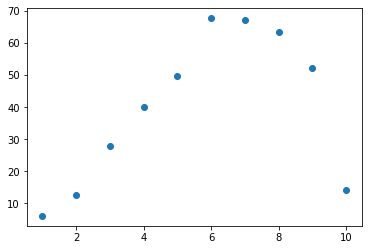

In [49]:
size_n = 10
theta = [1,4,-0.4]
a_train = np.linspace(1,10,size_n).reshape(size_n,1)
a2_train = a_train**2
a3_train = a_train**3
y_train = a_train*theta[0] + a2_train * theta[1] + a3_train * theta[2] + np.random.normal(loc=0.0, scale=5.0, size=size_n).reshape(size_n,1)
plt.scatter(a_train, y_train)

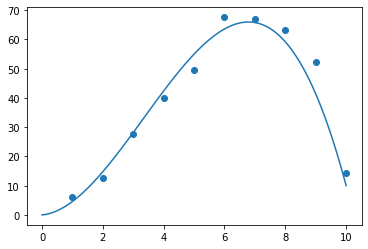

In [50]:
size_m=100
a_test = np.linspace(0,10,size_m).reshape(size_m,1)
a2_test = a_test**2
a3_test = a_test**3
y_test = a_test*theta[0] + a2_test* theta[1] + a3_test*theta[2]
plt.scatter(a_train, y_train)
plt.plot(a_test, y_test)

In [51]:
U_train = np.concatenate([a_train, a2_train, a3_train], axis=1)
U_test = np.concatenate([a_test, a2_test, a3_test], axis=1)

## Example Algorithm Parameters

In [52]:
nu_val =  10
lambda_val = 0.1
sigma_sq_val = 1
K = np.identity(U_train.shape[1])

# Explicit Kernel Boost Algorithm

## Fit iterative algorithm

In [53]:
iterative_boost = Boost.L2IterativeBoost(lambda_val, nu_val, sigma_sq_val)
iterative_boost.fit(U_train, y_train)
y_pred_iterative = iterative_boost.predict(U_test)
print(iterative_boost.theta_hat_boost)

[[-1.04330296]
 [ 4.50998821]
 [-0.42340251]]


## Fit Kernel Boost Algorithm

In [54]:
kernel_boost = Boost.L2KernelBoost(lambda_val, nu_val, sigma_sq_val)
kernel_boost.fit(U_train, y_train)
y_pred_kernel = kernel_boost.predict(U_test)
print(kernel_boost.theta_hat_boost)

[[-1.04330296]
 [ 4.50998821]
 [-0.42340251]]


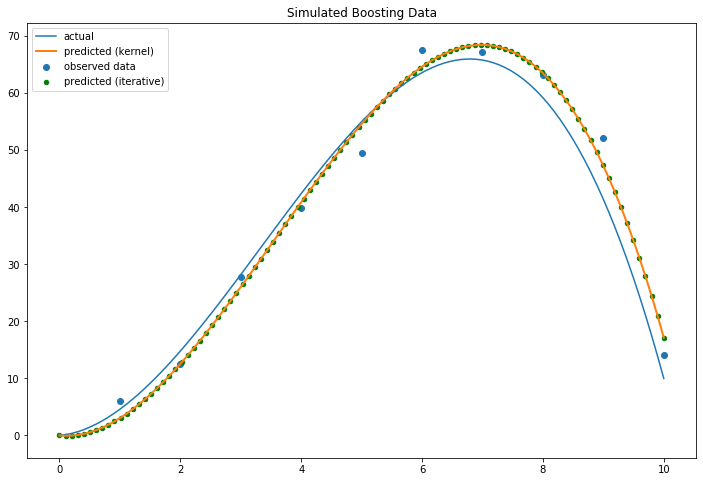

In [73]:
plt.figure(figsize=[12,8])
plt.scatter(a_train, y_train, label='observed data')
plt.plot(a_test, y_test, label='actual')
plt.plot(a_test, y_pred_kernel, label='predicted (kernel)',linewidth=2)
plt.scatter(a_test, y_pred_iterative, label='predicted (iterative)',color='green',s=20)
plt.title('Simulated Boosting Data')
plt.legend()
plt.savefig('images/simple-l2-algo-comp.png', bbox_inches='tight')

## Alternative Loss Functions

for outlier observations

In [56]:
y_train_out = y_train.copy() 
y_train_out[5] = y_train_out[5]-50

In [57]:
square_kernel_boost = Boost.ConvexKernelBoost('square', lambda_val, nu_val, sigma_sq_val)
square_kernel_boost.fit(U_train, y_train_out)
y_pred_square_kernel = square_kernel_boost.predict(U_test)
print(square_kernel_boost.theta_hat_boost)

[[ 1.38054313]
 [ 2.94387479]
 [-0.28509226]]


In [58]:
absolute_kernel_boost = Boost.ConvexKernelBoost('absolute', lambda_val, nu_val, sigma_sq_val)
absolute_kernel_boost.fit(U_train, y_train_out)
y_pred_absolute_kernel = absolute_kernel_boost.predict(U_test)
print(absolute_kernel_boost.theta_hat_boost)

[[-0.57479627]
 [ 4.21678174]
 [-0.39484058]]


In [59]:
huber_kernel_boost = Boost.ConvexKernelBoost('huber', lambda_val, nu_val, sigma_sq_val, loss_term_kwarg={'M':5})
huber_kernel_boost.fit(U_train, y_train_out)
y_pred_huber_kernel = huber_kernel_boost.predict(U_test)
print(huber_kernel_boost.theta_hat_boost)

[[-0.46831408]
 [ 4.16139491]
 [-0.39340689]]


In [60]:
vapnik_kernel_boost = Boost.ConvexKernelBoost('vapnik', lambda_val, nu_val, sigma_sq_val, loss_term_kwarg={'M':1})
vapnik_kernel_boost.fit(U_train, y_train_out)
y_pred_vapnik_kernel = vapnik_kernel_boost.predict(U_test)
print(vapnik_kernel_boost.theta_hat_boost)

[[ 0.19192866]
 [ 2.1654335 ]
 [-0.18209263]]


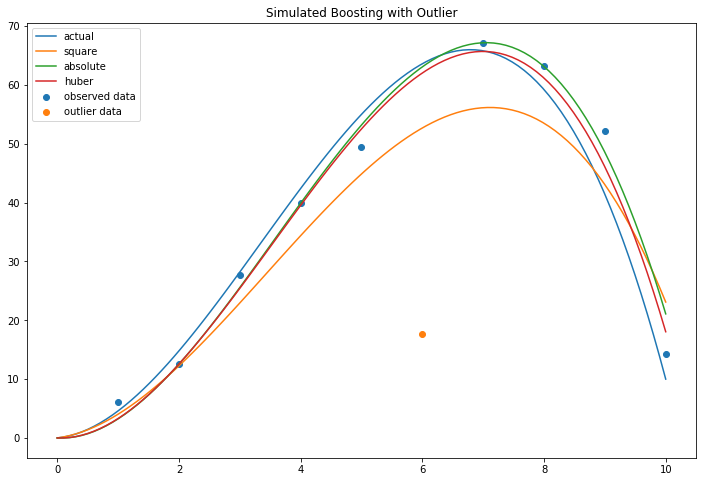

In [72]:
# reduce noise and plot everything to show the difference between the loss functions
plt.figure(figsize=[12,8])
good_idx = [0,1,2,3,4,6,7,8,9]
plt.scatter(a_train[good_idx], y_train_out[good_idx], label='observed data')
plt.scatter(a_train[5], y_train_out[5], label='outlier data')
plt.plot(a_test, y_test, label='actual')
plt.plot(a_test, y_pred_square_kernel, label='square')
plt.plot(a_test, y_pred_absolute_kernel, label='absolute')
plt.plot(a_test, y_pred_huber_kernel, label='huber')
plt.title('Simulated Boosting with Outlier')
plt.legend()
plt.savefig('images/simple-algo-loss-comp.png', bbox_inches='tight')

## General RKHS

In [62]:
ss_transform = StandardScaler()
ss_transform.fit(U_train)
U_train_ss = ss_transform.transform(U_train)

In [63]:
gauss_kernel_boost = Boost.KernelBoost(Kernel.Gaussian_Kernel, 'square', lambda_val, nu_val, sigma_sq_val)
gauss_kernel_boost.fit(U_train_ss, y_train)
U_test_ss = ss_transform.transform(U_test)
y_pred_gauss_kernel = gauss_kernel_boost.predict(U_test_ss)

In [64]:
gauss_iterative_boost = Boost.IterativeKernelBoost(Kernel.Gaussian_Kernel, 'square', lambda_val, nu_val, sigma_sq_val)
gauss_iterative_boost.fit(U_train_ss, y_train)
U_test_ss = ss_transform.transform(U_test)
y_pred_gauss_iterative = gauss_iterative_boost.predict(U_test_ss)

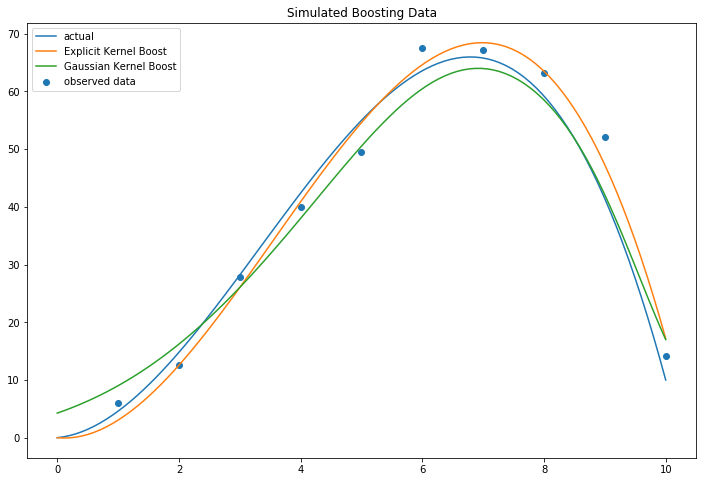

In [71]:
fig = plt.figure(figsize=[12,8])
plt.scatter(a_train, y_train, label='observed data')
plt.plot(a_test, y_test, label='actual')
plt.plot(a_test, y_pred_kernel, label='Explicit Kernel Boost')
plt.plot(a_test, y_pred_gauss_kernel, label='Gaussian Kernel Boost')
plt.legend()
plt.title('Simulated Boosting Data')
fig.savefig('images/simple-rkhs-comp.png', bbox_inches='tight')

In [66]:
print(gauss_kernel_boost.theta_hat_boost)
print(gauss_iterative_boost.theta_hat_boost)

[[-3.08122322]
 [-2.21673966]
 [ 5.64877383]
 [ 9.09856809]
 [ 9.91133434]
 [21.36300184]
 [19.20464209]
 [20.2741219 ]
 [21.73422683]
 [ 1.50545978]]
[[-3.08142518]
 [-2.21555386]
 [ 5.64685979]
 [ 9.10032943]
 [ 9.91027812]
 [21.36353971]
 [19.20433126]
 [20.2741058 ]
 [21.73407871]
 [ 1.50554184]]
